EDA and Preprocessing

In [424]:
#importing libraries
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc, roc_auc_score
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold

In [342]:
any_2015 = pd.read_csv("2015.csv")
any_2016 = pd.read_csv("2016.csv")
any_2017 = pd.read_csv("2017.csv")
any_2018 = pd.read_csv("2018.csv")
any_2019 = pd.read_csv("2019.csv")

In [343]:
any_2017 = any_2017.rename(columns = {
    'Happiness.Rank':'Happiness Rank', 'Economy..GDP.per.Capita.':'Economy (GDP per Capita)', 
    'Health..Life.Expectancy.':'Health (Life Expectancy)','Trust..Government.Corruption.':'Trust (Government Corruption)'
})

any_2018 = any_2018.rename(columns = {
    'Country or region':'Country', 'Overall rank':'Happiness Rank', 'GDP per capita':'Economy (GDP per Capita)',
    'Social support':'Family', 'Healthy life expectancy':'Health (Life Expectancy)', 'Freedom to make life choices':'Freedom',
    'Perceptions of corruption':'Trust (Government Corruption)'
})
any_2019 = any_2019.rename(columns = {
    'Country or region':'Country', 'Overall rank':'Happiness Rank', 'GDP per capita':'Economy (GDP per Capita)',
    'Social support':'Family', 'Healthy life expectancy':'Health (Life Expectancy)', 'Freedom to make life choices':'Freedom',
    'Perceptions of corruption':'Trust (Government Corruption)'
})

In [344]:
for df in dfs:
    print(df.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia.Residual'],
      dtype='object')
Index(['Happiness Rank', 'Country', 'Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom', 'Gene

In [345]:
dfs = [any_2015, any_2016, any_2017, any_2018, any_2019]

In [346]:
df = pd.concat(dfs) #unim datasets
df =df.sort_values(by = ['Country']) #els ordenem per país

print("Número de mostres: ", len(df), "\n")

for col in df.columns:
    print(col)
    print("nulls: ", df[col].isnull().sum(), "\n")

Número de mostres:  782 

Country
nulls:  0 

Region
nulls:  467 

Happiness Rank
nulls:  0 

Happiness Score
nulls:  467 

Standard Error
nulls:  624 

Economy (GDP per Capita)
nulls:  0 

Family
nulls:  0 

Health (Life Expectancy)
nulls:  0 

Freedom
nulls:  0 

Trust (Government Corruption)
nulls:  1 

Generosity
nulls:  0 

Dystopia Residual
nulls:  467 

Lower Confidence Interval
nulls:  625 

Upper Confidence Interval
nulls:  625 

Happiness.Score
nulls:  627 

Whisker.high
nulls:  627 

Whisker.low
nulls:  627 

Dystopia.Residual
nulls:  627 

Score
nulls:  470 



In [347]:
df = df.drop(columns=['Happiness Score','Standard Error','Dystopia Residual','Lower Confidence Interval','Upper Confidence Interval','Happiness.Score','Whisker.high','Whisker.low','Dystopia.Residual','Score',])
#eliminem les columnes amb 467 o més valors nulls, menys GDP per càpita
df = df.reset_index()
df = df.drop(index=df.iloc[np.where(df['Country'] == 'Northern Cyprus')].index)
df = df.drop(index=df.iloc[np.where(df['Country'] == 'Northern Macedonia')].index)

df.at[625,['Country']] = 'Somaliland Region'

Tractament dels valors nuls restants

In [348]:
countries = list(set(df['Country'].values))
countries = sorted(countries)

In [349]:
new_regions = []
for i in range(len(countries)):
        country_index = np.where(df['Country'] == countries[i]) # Get indexes of current country
        current_country_df = df.iloc[country_index] #get values of current indexes
        if all(pd.isnull(current_country_df['Region'].values)): # if all null for regions, drop country from df
            country_index = np.where(df['Country'] == countries[i])[0]
            for vals in country_index:
                try:
                    df = df.drop(index = vals)
                except KeyError:
                    pass
        else:
            region_name_pos = np.where([type(x) == str for x in current_country_df['Region'].values])[0][0]
            region = current_country_df['Region'].values[region_name_pos]
            current_country_df = current_country_df.replace(np.nan, region)
            new_regions.append(current_country_df['Region'].values)

In [350]:
new_regions = list(new_regions)
k = 0
region_vals = []
for arr in new_regions:
    for vals in arr:
        region_vals.append(vals)
        k+=1
        
len(region_vals)

771

In [351]:
df['Region'] = region_vals
df.head(20)

,index,Country,Region,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,153,Afghanistan,Southern Asia,154,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680
1,152,Afghanistan,Southern Asia,153,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100
2,144,Afghanistan,Southern Asia,145,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000
3,153,Afghanistan,Southern Asia,154,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000
4,140,Afghanistan,Southern Asia,141,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871
5,108,Albania,Central and Eastern Europe,109,0.996193,0.803685,0.731160,0.381499,0.039864,0.201313
6,108,Albania,Central and Eastern Europe,109,0.955300,0.501630,0.730070,0.318660,0.053010,0.168400
7,111,Albania,Central and Eastern Europe,112,0.916000,0.817000,0.790000,0.419000,0.032000,0.149000
8,106,Albania,Central and Eastern Europe,107,0.947000,0.848000,0.874000,0.383000,0.027000,0.178000
9,94,Albania,Central and Eastern Europe,95,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720


In [352]:
#Convertire les regions en variables categóriques i les afegiré com a columnes ja que poden
#aportar informació interessant

In [353]:
one_hot_regions = pd.get_dummies(df['Region'],prefix = 'Region') #convertim les regions en un dataset categóric
df = df.join(one_hot_regions) #afegim les noves columnes al dataframe principal
df = df.drop(columns = 'Region') #eliminem la columna de les regions

In [354]:
#ara el data frame llueix així:
df

,index,Country,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,153,Afghanistan,154,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,0,0,0,0,0,0,0,1,0,0
1,152,Afghanistan,153,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,0,0,0,0,0,0,0,1,0,0
2,144,Afghanistan,145,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,0,0,0,0,0,0,0,1,0,0
3,153,Afghanistan,154,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,0,0,0,0,0,0,0,1,0,0
4,140,Afghanistan,141,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,143,Zimbabwe,144,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,0,0,0,0,0,0,0,0,1,0
778,145,Zimbabwe,146,0.366000,1.114000,0.433000,0.361000,0.089000,0.151000,0,0,0,0,0,0,0,0,1,0
779,114,Zimbabwe,115,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,0,0,0,0,0,0,0,0,1,0
780,130,Zimbabwe,131,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,0,0,0,0,0,0,0,0,1,0


In [363]:
print(np.max(df['Happiness Rank']))
print(np.min(df['Happiness Rank']))

values = list(df['Happiness Rank'].values)
values.sort()
top_50 = values[len(values)//2]
print(len(values))
print(top_50)
print(values)

158
1
771
79
[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 44, 44, 44, 44, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 53,

Un altre caraterística a modificar és el rang de felicitat ('Happiness Rank') ja que serà la nostra característica objectiu, la característica a predir segons les altres cracterístiques. 
Com el seu rang de valors és molt ampli, concretament pot agafar valors de l'1 al 158 i per tant predir-lo seria massa complicat. Com el que ens interessa en el fons és saber si la població és majoritáriament feliç o no, dividrem les msotres segons feliços = 1 (amb happiness rank >= mitja) o no feliços = 0.

In [364]:
happiness_benchmark = []
for rank in df['Happiness Rank'].values:
    if rank <= 79:
        happiness_benchmark.append(1)
    else:
        happiness_benchmark.append(0)
df['Happiness Rank'] = happiness_benchmark
df=df.sample(frac=1)

In [365]:
df = df.drop(columns = ['Country', 'index'])

In [366]:
df = df.dropna(axis=0)
target = df['Happiness Rank']

In [367]:
df = df.drop(columns = ['Happiness Rank'])

In [368]:
df.isnull().values.any()

False

In [369]:
df

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
32,1.372000,1.54800,1.036000,0.557000,0.29000,0.332000,1,0,0,0,0,0,0,0,0,0
331,0.831000,1.47800,0.831000,0.490000,0.02800,0.107000,0,0,0,1,0,0,0,0,0,0
510,0.069400,0.77265,0.297070,0.476920,0.15639,0.193870,0,0,0,0,0,0,0,0,1,0
282,1.241420,0.93164,0.676080,0.197700,0.04472,0.099000,0,1,0,0,0,0,0,0,0,0
258,0.781000,1.26800,0.608000,0.604000,0.07100,0.179000,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.024000,0.00000,0.010000,0.305000,0.03800,0.218000,0,0,0,0,0,0,0,0,1,0
277,1.438000,1.27700,1.122000,0.440000,0.28700,0.258000,0,0,1,0,0,0,0,0,0,0
721,1.052000,1.53800,0.657000,0.394000,0.02800,0.244000,0,1,0,0,0,0,0,0,0,0
733,1.626343,1.26641,0.726798,0.608345,0.32449,0.360942,0,0,0,0,1,0,0,0,0,0


Anem a crear l'arbre

In [382]:
n = len(df)
percentatge = int(0.8 * n)
caract = df.columns
x_train = df[list(caract)][:percentatge]
y_train = target[:percentatge]

x_test = df[list(caract)][percentatge:]
y_test = target[percentatge:]

In [383]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [372]:
accuracies = []
for i in np.arange(1,4): #Want to make it read-able, so beyond 4 is too much
    max_depth = i
    print('max_depth :', i)
    dt_classifier = DecisionTreeClassifier(max_depth = max_depth)
    dt_classifier.fit(x_train,y_train)
    pred = dt_classifier.predict(x_test)
    print(accuracy_score(y_true = y_test, y_pred = pred))
    accuracies.append(accuracy_score(y_true = y_test, y_pred = pred))
    
best = np.max(accuracies)
best_depth = np.where(accuracies == best)[0][0]

dt_classifier = DecisionTreeClassifier(max_depth = best_depth)
dt_classifier.fit(x_train,y_train)

max_depth : 1
0.8376623376623377
max_depth : 2
0.8766233766233766
max_depth : 3
0.922077922077922


DecisionTreeClassifier(max_depth=2)

[Text(1116.0, 1721.3999999999999, 'Economy (GDP per Capita) <= 1.03\ngini = 0.499\nsamples = 616\nvalue = [298, 318]\nclass = Top 50'),
 Text(558.0, 1032.84, 'Region_Latin America and Caribbean <= 0.5\ngini = 0.355\nsamples = 342\nvalue = [263, 79]\nclass = Not Top 50'),
 Text(279.0, 344.28, 'gini = 0.196\nsamples = 282\nvalue = [251, 31]\nclass = Not Top 50'),
 Text(837.0, 344.28, 'gini = 0.32\nsamples = 60\nvalue = [12, 48]\nclass = Top 50'),
 Text(1674.0, 1032.84, 'Economy (GDP per Capita) <= 1.124\ngini = 0.223\nsamples = 274\nvalue = [35, 239]\nclass = Top 50'),
 Text(1395.0, 344.28, 'gini = 0.481\nsamples = 57\nvalue = [23, 34]\nclass = Top 50'),
 Text(1953.0, 344.28, 'gini = 0.104\nsamples = 217\nvalue = [12, 205]\nclass = Top 50')]

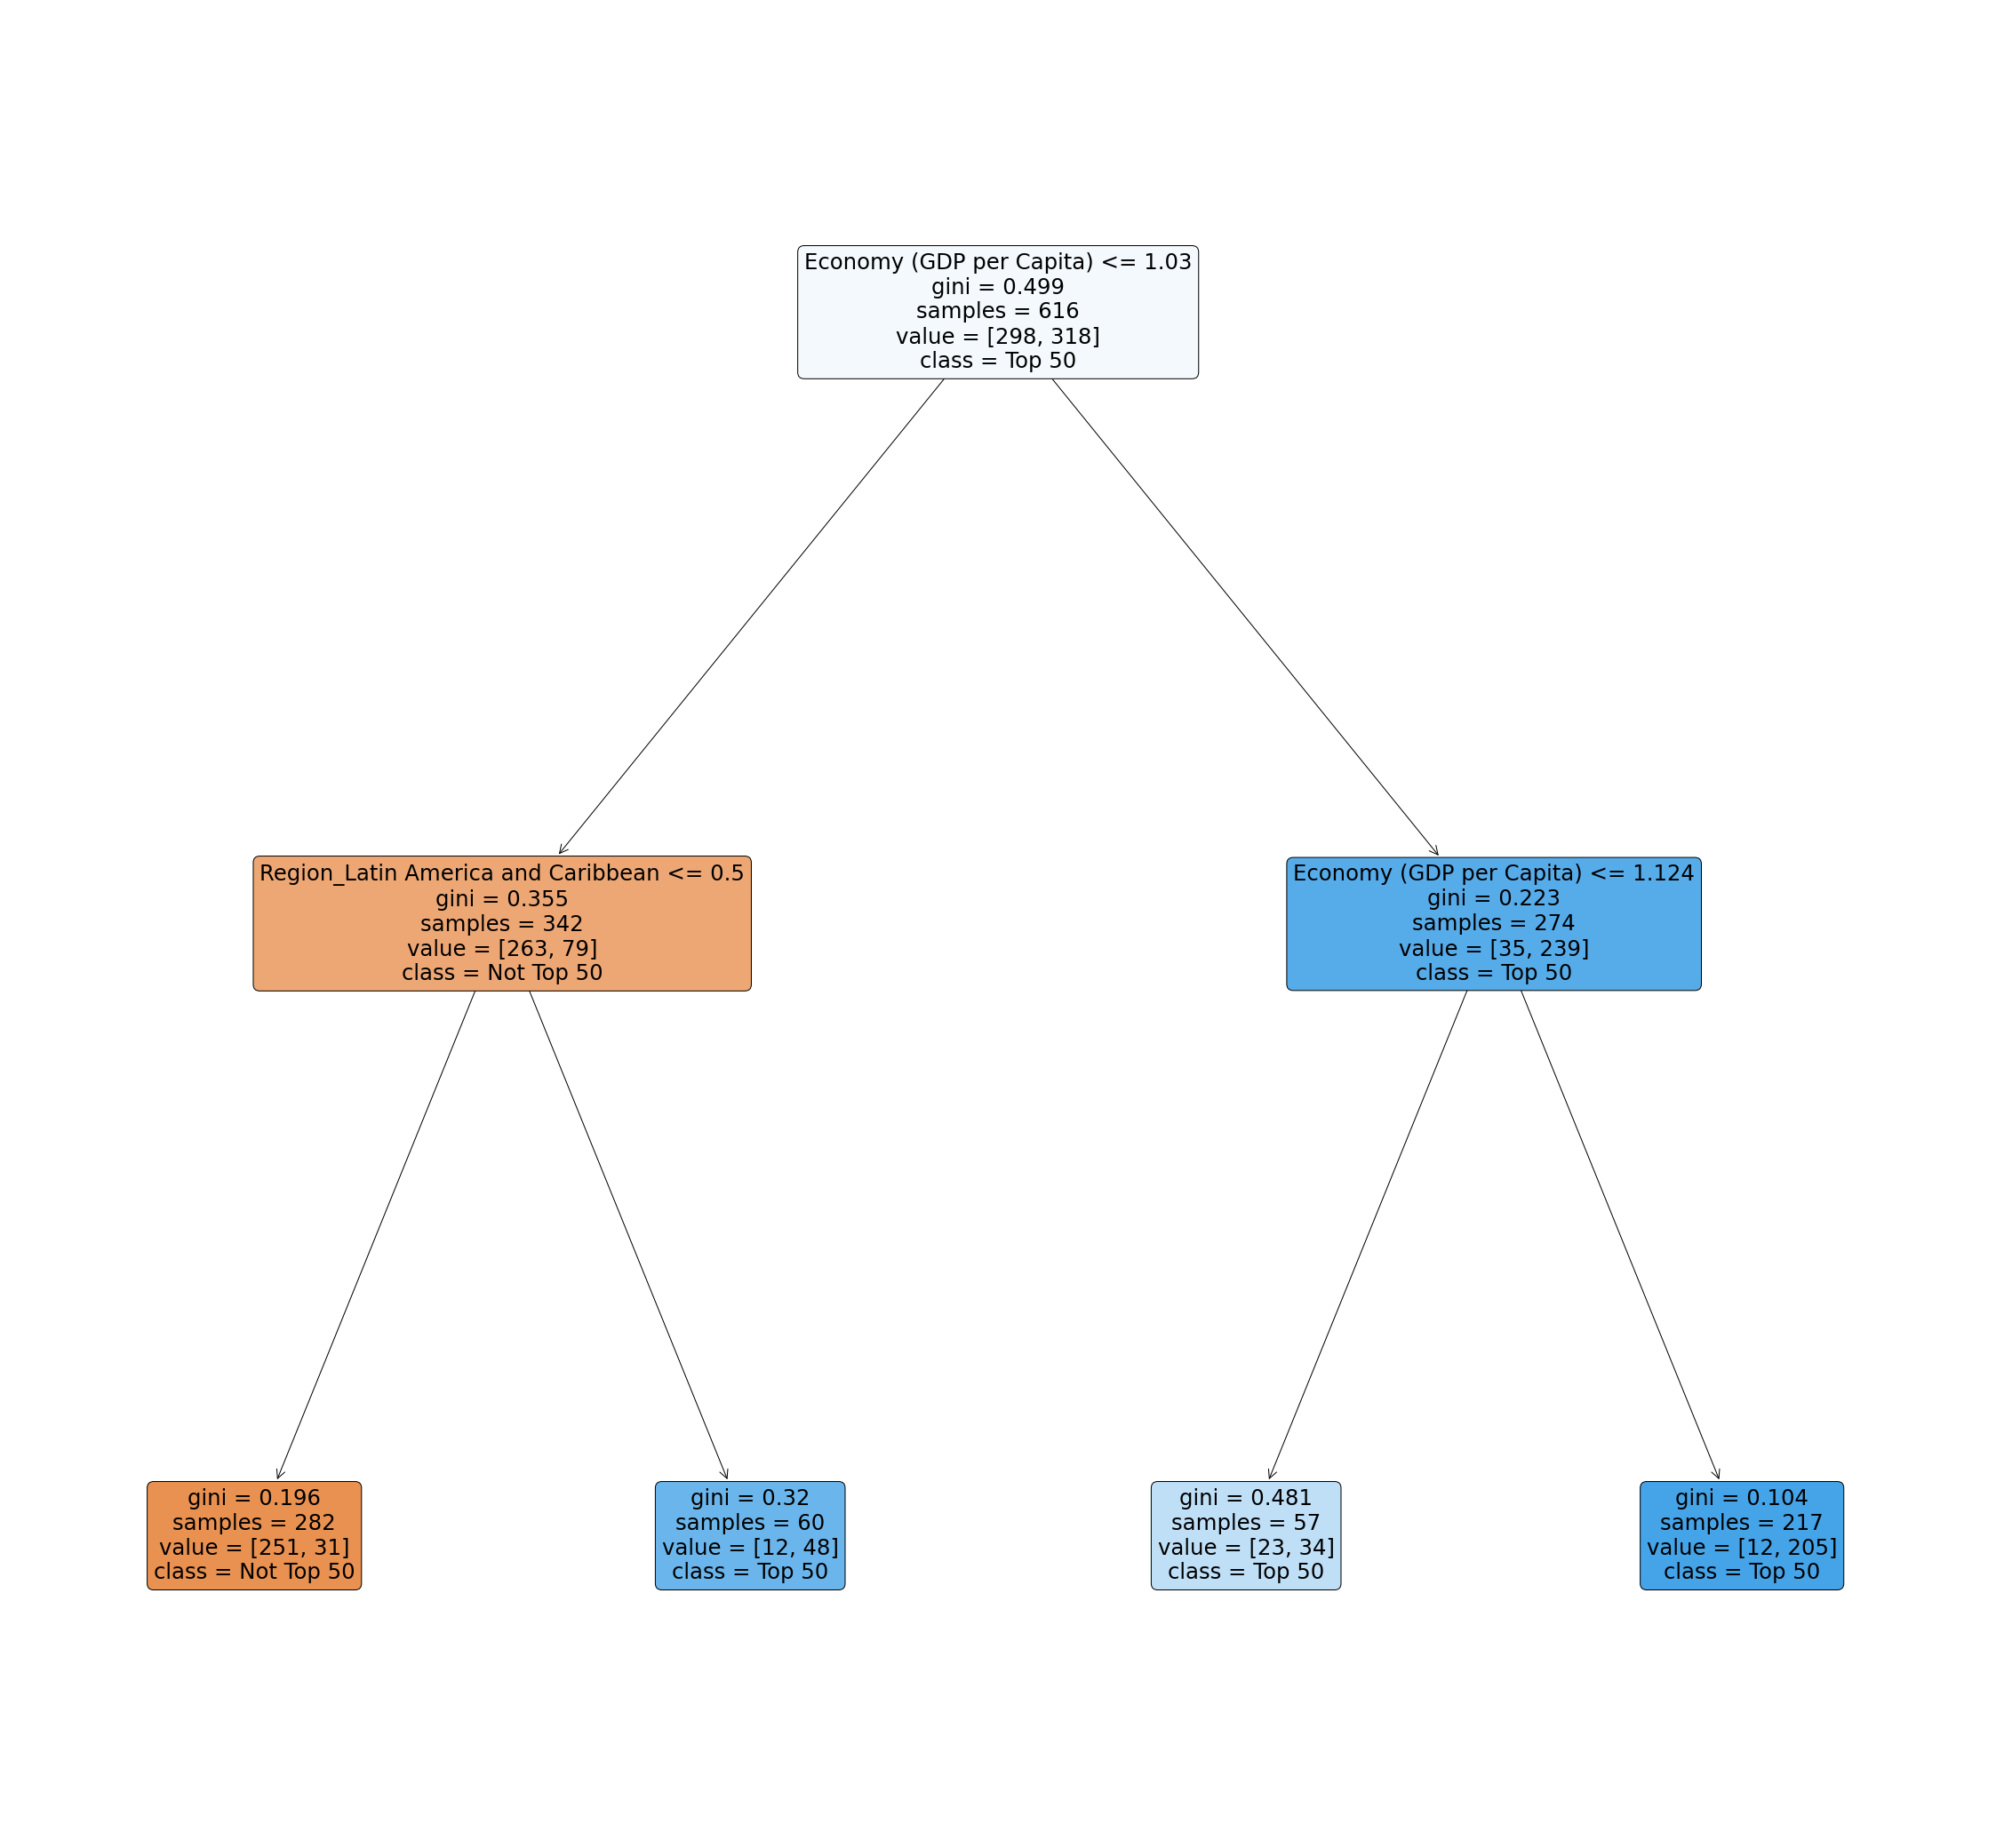

In [374]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40,38))
plot_tree(dt_classifier, feature_names = caract, class_names = ['Above average', 'Below average'],  # 0 -> not top 50, 1 -> top 50
          filled=True, rounded = True)

In [375]:
preds_dtc = dt_classifier.predict(x_test)
preds_rfc = rf_classifier.predict(x_test)

In [376]:
accuracy_score(y_true = y_test, y_pred = preds_dtc)

0.8766233766233766

In [377]:
accuracy_score(y_true = y_test, y_pred = preds_rfc)

0.9090909090909091

In [378]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, preds_dtc, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.91      0.86      0.89        87
     class 1       0.83      0.90      0.86        67

    accuracy                           0.88       154
   macro avg       0.87      0.88      0.88       154
weighted avg       0.88      0.88      0.88       154



In [379]:
print(classification_report(y_test, preds_rfc, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.90      0.92        87
     class 1       0.87      0.93      0.90        67

    accuracy                           0.91       154
   macro avg       0.91      0.91      0.91       154
weighted avg       0.91      0.91      0.91       154



In [393]:
# Compute Precision-Recall and plot curve
n_classes = 2
fpr, tpr, thresholds = roc_curve(y_test, preds_rfc)
auc = roc_auc_score(y_test, preds_rfc)
print('AUC: %.3f' % auc)

AUC: 0.911


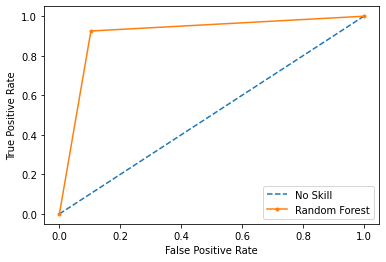

In [397]:
# calculate roc curves
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, preds_rfc)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: f1=0.899 auc=0.916


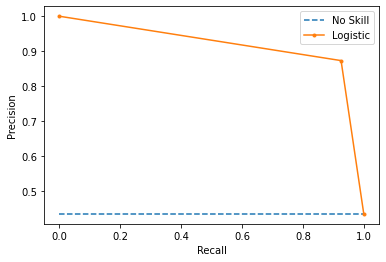

In [418]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, preds_rfc)
lr_f1, lr_auc = f1_score(y_test, preds_rfc), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Hyperparameter Search

In [431]:
# define model
model = RandomForestClassifier()
# define search space
space = dict()

# define search
search = GridSearchCV(model, space)

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
search = GridSearchCV(model, space, cv = cv,n_jobs=-1)
result = search.fit(x_train, y_train)

In [432]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9113872730477702
Best Hyperparameters: {}


In [433]:
rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(x_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\

C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\

C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\

C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\

C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\

C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\

C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\

C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\

C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\

C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\

C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NOA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\NOA\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\

{'max_depth': 14, 'max_features': 4}
0.9237704918032786
